Applied Question #9 on pg. 554 of ISLR Python.
Michael Bishop

In [15]:
# %% imports
from statsmodels.datasets import get_rdataset
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.preprocessing import StandardScaler

# %% load data
USArrests = pd.read_csv('/drive/data/USArrests.csv', index_col=0)
USArrests.index.name = 'State'
USArrests


,Murder,Assault,UrbanPop,Rape
State,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9


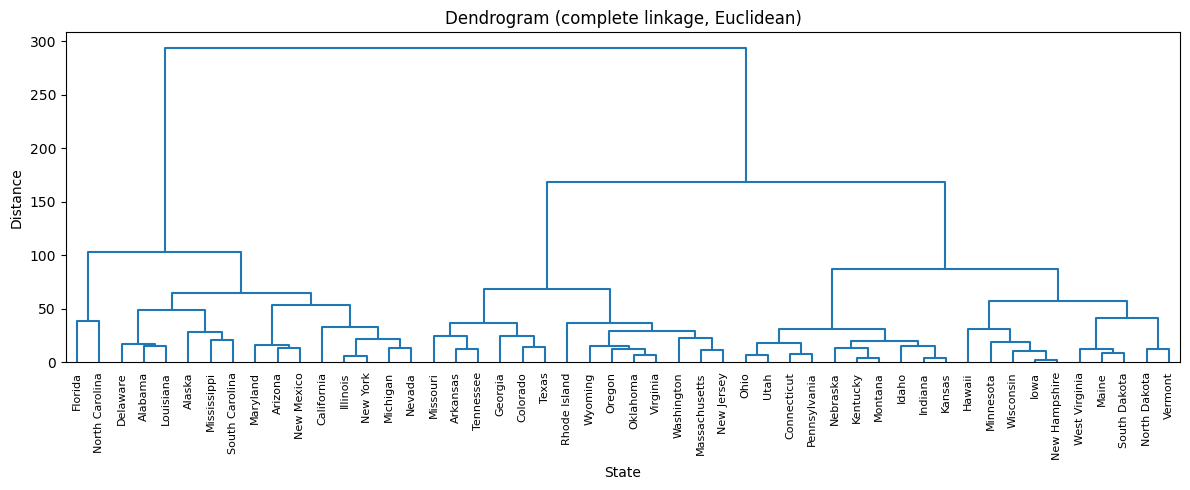

In [9]:
# (a) hierarchical clustering (complete linkage, Euclidean)
Z = linkage(USArrests, method='complete', metric='euclidean')

plt.figure(figsize=(12, 5))
dendrogram(
    Z,
    labels=USArrests.index,
    leaf_rotation=90,
    leaf_font_size=8,
    color_threshold=0
)
plt.title('Dendrogram (complete linkage, Euclidean)')
plt.xlabel('State')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()

In [10]:
# (b) cut to get 3 clusters and list members
clusters = fcluster(Z, t=3, criterion='maxclust')
cluster_df = pd.Series(clusters, index=USArrests.index, name='Cluster')

for c in sorted(cluster_df.unique()):
    members = cluster_df[cluster_df == c].index.tolist()
    print(f"Cluster {c} ({len(members)} states):")
    print(", ".join(members))
    print()

Cluster 1 (16 states):
Alabama, Alaska, Arizona, California, Delaware, Florida, Illinois, Louisiana, Maryland, Michigan, Mississippi, Nevada, New Mexico, New York, North Carolina, South Carolina

Cluster 2 (14 states):
Arkansas, Colorado, Georgia, Massachusetts, Missouri, New Jersey, Oklahoma, Oregon, Rhode Island, Tennessee, Texas, Virginia, Washington, Wyoming

Cluster 3 (20 states):
Connecticut, Hawaii, Idaho, Indiana, Iowa, Kansas, Kentucky, Maine, Minnesota, Montana, Nebraska, New Hampshire, North Dakota, Ohio, Pennsylvania, South Dakota, Utah, Vermont, West Virginia, Wisconsin



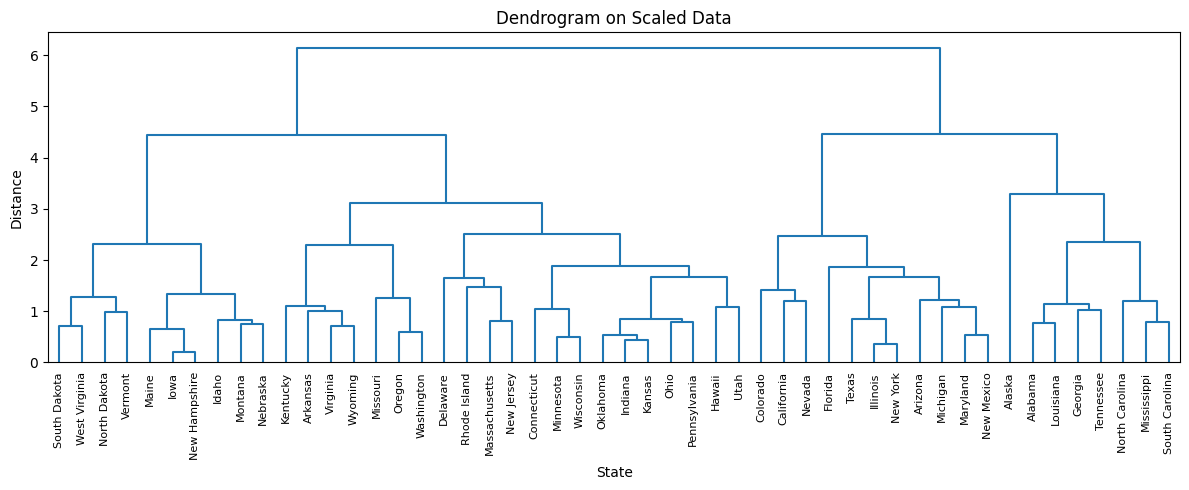

Scaled Cluster 1 (31 states):
Arkansas, Connecticut, Delaware, Hawaii, Idaho, Indiana, Iowa, Kansas, Kentucky, Maine, Massachusetts, Minnesota, Missouri, Montana, Nebraska, New Hampshire, New Jersey, North Dakota, Ohio, Oklahoma, Oregon, Pennsylvania, Rhode Island, South Dakota, Utah, Vermont, Virginia, Washington, West Virginia, Wisconsin, Wyoming

Scaled Cluster 2 (11 states):
Arizona, California, Colorado, Florida, Illinois, Maryland, Michigan, Nevada, New Mexico, New York, Texas

Scaled Cluster 3 (8 states):
Alabama, Alaska, Georgia, Louisiana, Mississippi, North Carolina, South Carolina, Tennessee



In [11]:
# (c) scale variables then recluster
scaler = StandardScaler()
US_scaled = pd.DataFrame(
    scaler.fit_transform(USArrests),
    index=USArrests.index,
    columns=USArrests.columns
)

Zs = linkage(US_scaled, method='complete', metric='euclidean')

plt.figure(figsize=(12, 5))
dendrogram(
    Zs,
    labels=US_scaled.index,
    leaf_rotation=90,
    leaf_font_size=8,
    color_threshold=0
)
plt.title('Dendrogram on Scaled Data')
plt.xlabel('State')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()

clusters_s = fcluster(Zs, t=3, criterion='maxclust')
cluster_s_df = pd.Series(clusters_s, index=US_scaled.index, name='Cluster')

for c in sorted(cluster_s_df.unique()):
    members = cluster_s_df[cluster_s_df == c].index.tolist()
    print(f"Scaled Cluster {c} ({len(members)} states):")
    print(", ".join(members))
    print()

In [14]:
USArrests.var()

Murder        18.970465
Assault     6945.165714
UrbanPop     209.518776
Rape          87.729159
dtype: float64

(d) Effect of scaling & recommendation
Effect: Without scaling, variables with larger variances (e.g., Assault) dominate the Euclidean distances, so clusters primarily reflect differences in those high-variance measures. After scaling, each variable contributes equally, and you often get quite different cluster memberships.

Should one scale? Yes, when your variables are on different scales or have very different variances, and you want each to contribute equally to the dissimilarity/similarity measure. If, however, the raw variances themselves carry some form of meaning, you might skip scaling, however this is likely a rare situation.